# [SWCON253] Machine Learning
Teaching Assistant: Hyundong Cho (gusehd1113@khu.ac.kr)

Professor: Jinwoo Choi (jinwoochoi@khu.ac.kr)

---

# P1:  Pure Python만을 이용하여 Perceptron 구현 (10점)

### 학습목표
- Perceptron Python class를 직접 구현하면서 NN의 작동방법을 이해한다.
- 머신러닝 모델의 데이터 준비, 개발, 학습, 검증, 시각화 과정을 이해하고 설명 할 수 있다.

### 실습내용
Frank Rosenblatt의 classic perceptron binary classication(0 또는 1을 구분하는)을 구현합니다. <br>
여러분은 "Pure" 혹은 "vanilla" Python 함수만을 사용하여 구현해야합니다. 그러므로 시각화를 위한 matplotlib 이외의 패키지는 사용하지마세요.

실습은 다음 순서로 진행됩니다. 학생분들께서는 **<구현>**과 **<작성>**에 해당하는 부분을 수행해주시면 됩니다.

- S1. Perceptron 구현 및 분석
    - 1) 실습에서 사용되는 패키지 import
    - 2) 주어진 데이터셋 loading
    - 3) Perceptron Model 구현 **<구현>**
    - 4) Perceptron Model 학습
    - 5) Perceptron Model 검증
    - 6) Decision Boundary 시각화

<br>

- S2. Discussion **<작성>**

### 점수
- Perceptron model 구현: 각 함수별로 2점


### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.

## S1.  Perceptron 구현 및 분석

## 1-1) Imports
**! 수정하지 마세요.** pure python으로만 코드를 작성합니다. `matplotlib`이외의 패키지는 사용하지 않습니다.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1-2) Loading the Dataset
**! 수정하지 마세요.** 

코드를 실행시켜 실습코드와 같이 첨부된 dataset.csv파일을 로드합니다.

두 개의 class(0, 1)를 갖는 2차원 데이터이며, class 0은 -1의 값을 가지고 class 1은 1의 값을 가집니다.

In [2]:
# CSV 파일을 읽기
X, y = [], []

with open('./dataset.csv', 'r') as f:
    next(f)
    classes = [-1, 1]
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(classes[int(values[-1])])
print(len(X), len(y))
print(y)

100 100
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Dataset Split & Visualization

**! 수정하지 마세요.** 

Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [3]:
import random

# 랜덤시드 설정
random.seed(123)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 80개 까지는 학습용으로 뒤 20개는 테스트용으로 split
X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

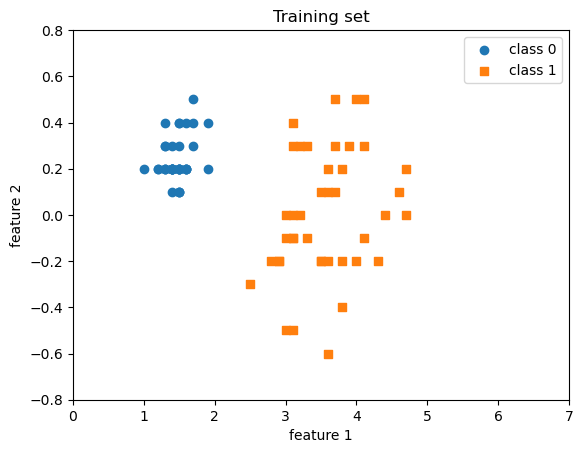

In [4]:
# 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == -1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == -1],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## 1-3) Perceptron model 구현
이 부분에서는 직접 `Perceptron model`을 구현해 봅니다.

Perceptron model은 생성자, forward, backward, train, evaluation 다섯개 함수로 이루어져 있습니다.
- `__init__` 생성자에서는 Perceptron의 weights와 bias를 초기화합니다.
- `forward`에서는 input을 Perceptron의 가중치를 이용해서 예측을 수행합니다.
- `backward`에서는 Perceptron의 가중치를 학습하기 위한 gradient를 계산합니다.
- `train`에서는 Perceptron을 학습하는 과정으로 `forward`와 `backward`를 차례로 반복하여 Perceptron의 가중치를 업데이트 합니다.
- `evaluation`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다. **(주의: Accuracy 계산)**

아래 `# <your code>` 부분을 채워 넣어서 Perceptron class를 직접 작성하여 구현하세요.

**세부 구현 사항:**
- weights는 랜덤으로 초기화, bias는 0으로 초기화한다.
- activation function은 입력값을 기준으로 `0 초과는 1, 0 이하는 -1`을 출력하게 한다.
- 주의: <U>**Cost Function은 MSE 또는 Cross-Entropy가 아닌 $J(w) = -y(w^Tx)$를 사용**</U>한다. , $x\in Y$는 **틀린 샘플의 집합** 

#### Perceptron
![Perceptron](https://www.researchgate.net/profile/Daniel-Alvarez-34/publication/315788933/figure/fig3/AS:479799241121795@1491404461957/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the.png)
출처: https://www.researchgate.net/figure/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the_fig3_315788933

In [5]:


class Perceptron():
    def __init__(self, num_features):
        self.weights =random.choices(range(1,11), k = num_features)# <your code> initialization
        self.bias = 0 # <your code> initialization
        self.lr = 0.01

    # 모델의 출력을 반환하는 함수
    def forward(self, x):
        z= []
        for i in range(0,len(x)):
            z.append(x[i]* self.weights[i])
            sigma = z[i]
        
        linear = sigma + self.bias# <your code> compute weighted sum

        # <your code> apply activation  

        if linear > 0 :
            prediction = 1
        else:
            prediction = -1
        
        return prediction
        
    # 손실함수에 기반하여 모델의 가중치를 업데이트하기 위한 gradient를 반환하는 함수
    def backward(self, x, y):
        gradient = self.lr*y*x # <your code> to compute the gradient
        return gradient
        
    def train(self, x, y, epochs):
        # epochs 만큼 학습
        for e in range(epochs):
            # Each data point (Stochastic learning)
            count = 0
            for i in range(len(y)):
                x_, y_ = x[i], y[i]
                # 오분류 샘플에 대해서만 gradient를 계산하여 모델의 가중치를 업데이트 함
                if y_ != self.forward(x_):
                    count += 1
                    for j in range(len(x_)):
                        gradient= self.backward(x_[j],y_) # <your code> to compute the gradient

                        self.weights[j] = self.weights[j] - gradient
                        # <your code> to update the weights
                    self.bias -= -y_ * self.lr*10
            
               
    def evaluate(self, x, y):
        # <your code> to compute the prediction accuracy 
        count = 0
        for i in range(0,len(y)):
            x_, y_ = x[i], y[i]
            if y_ != self.forward(x_):
                count +=1      
        accuracy = (len(y)-count) / len(y)
        return accuracy

## 1-4) Perceptron 학습

작성한 Perceptron을 Trainset을 이용해 10 epoch 학습하고 학습된 weight, bias를 print합니다.

In [6]:
ppn = Perceptron(num_features=2)  # 위에서 구현한 Perceptron 모델 정의
ppn.train(X_train, y_train, 10)    # 10 epoch 학습

# 학습된 모델의 weight, bias 출력
print(ppn.weights)
print(ppn.bias)

[4.7039999999999935, 11.214000000000171]
-2.0000000000000004


## 1-5) 모델 평가
Training set과 Test set각각에서 모델의 accuracy를 계산합니다.

In [7]:
# Train dataset에서 성능 평가
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 21.25%


In [8]:
# Test dataset에서 성능 평가
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 30.00%


## 1-6) Decision Boundary
train 데이터셋과 test 데이터셋 각각을 이용하여 2개의 scatter plot을 그리고 그 위에 학습된 가중치를 이용하여 결정경계를 시각화합니다.

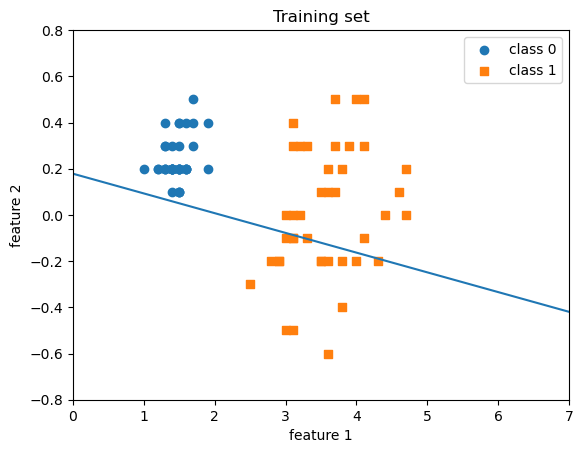

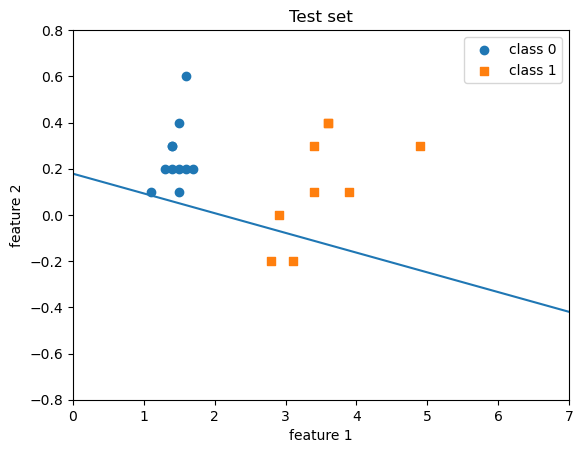

In [9]:
### Train 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == -1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == -1],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')
# Perscptron의 Weight와 Bias를 그래프로 표현
#plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -(7*ppn.weights[0] + ppn.bias)/ppn.weights[1]])
plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -ppn.weights[0]/ppn.weights[1]])

# 그래프로 표현
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

### Test 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == -1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == -1],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
# Perscptron의 Weight와 Bias를 그래프로 표현
#plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -(7*ppn.weights[0] + ppn.bias)/ppn.weights[1]])
plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -ppn.weights[0]/ppn.weights[1]])
# 그래프로 표현
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## S2. Discussion

**1) 예시에서 사용된 activation 함수 이외의 어떤 함수가 있는지 찾아보고 설명해보세요.**

[답변작성]

예시에서 사용된 activation함수는 step function이다. 예시에 사용된 step function은 입력값이 임계값을 넘으면 1을 출력하고 그렇지 않으면 -1을 출력하는 구조이다. 

예시에서 사용된 activation함수 말고도 퍼셉트론에는 다양한 activation 함수들이 존재한다.

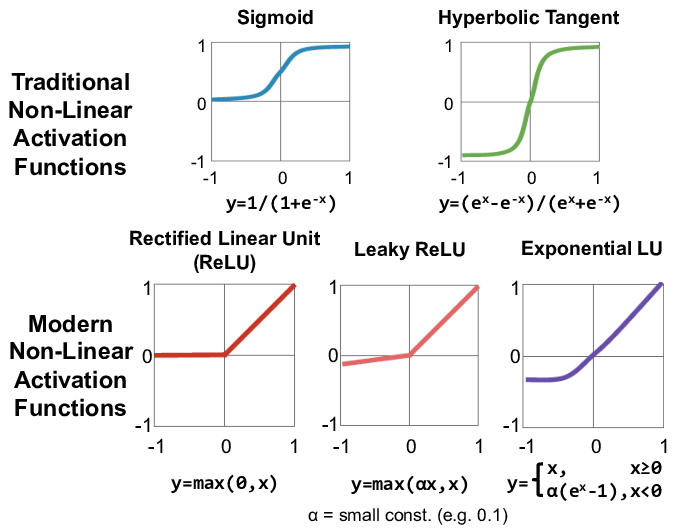

**1. 시그모이드 함수 (sigmoid function)**

시그모이드 함수는 계단 함수와 비슷한다. 계단 함수는 임계점에서 불연속임에 비해, 시그모이드 함수는 매끄러운 연속함수를 차이가 있다. 따라서 미분 가능성을 특징으로 하여 역전파 알고리즘에 더 적합하다.

**2. 하이퍼볼릭 탄젠트 함수 (hyperbolic tangent function)**

하이퍼볼릭 탄젠트 함수는 시그모이드 함수와 유사하지만 그 출력값의 범위에 차이가 있다. 시그모이드 함수는 출력이 (0,1)로 제한이 되는 반면 하이퍼볼릭 탄제느 함수는 출력이 (-1,1)로 제한이 되는 특징이 있다. 

**3. ReLu 함수**

ReLu함수는 입력값이 양수인 경우에는 그 값을 그대로 출력하고, 음수일 경우에는 0을 출력하는 함수이다. 따라서 특정 양수 값이 수렴하지 않고 양수 인 경우 자기 자신을 그대로 반환하기 때문에 딥러닝에서 시그모이드 함수를 사용해 발생하는 문제인 기울기소실 문제가 발생하지 않는다.
또한 다른 활성함수에 비해 학습 속도가 빠르다.
하지만 앞서 얘기했듯 입력값이 음숭니 경우에는 0을 출력하기 때문에 가중치 업데이트가 안되는 현상이 발생할 수 있다.

**4. Leaky ReLu 함수**

Leaky Relu 함수는 ReLu함수의 변형으로 기본적인 형태는 다음과 같다. 먼저 입력값이 양수인 경우에는 그 겂을 그대로 출력하며, 입력값이 음수인 경우에는 그 입력에 선형적으로 비례하는 작은 음수를 출력한다. 일반적인 ReLu함수의 경우에는 입력값이 음수인 경우 출력이 0이 되므로 그래디언트가 0이 되어 역전파 학습 시 가중치 업데이트가 멈추는 문제를 일으킬 수 있다. 하지만 Leaky ReLu의 경우에는 입력이 음수인 경우에 작음 음수값을 출력하므로 이러한 문제를 해결할 수 있다. 또한 비선형 활성함수이기 때문에 신경망에서 비선형 패턴을 학습할 수 있게 된다.






**2) Perceptron 하나로 풀 수 없는 문제는 어떤것이 있는지 왜 그런지 설명해보세요.**

[답변작성]

단층 퍼셉트론은 선형으로 분류되지 않는 데이터들에 대해 적절하게 모델링 할 수 없다. 따라서 어느정도의 정확성까지는 기대할 수 있으나, 100% 완벽하게 분류되는 정확성을 기대할 수 없다. 따라서 대표적으로 XOR문제나 이미지나 음성 데이터와 같은 비정형 데이터와 같이 선형적으로 분류되지 않는 데이터들에 대해서는 완벽하게 최적화된 해를 구하는 것이 불가능하다.

---